#learning rate

https://chat.openai.com/share/c571a4a0-d88c-432c-9236-1a07bb69cdb6

https://studymachinelearning.com/neural-network-introduction-to-learning-rate/#:~:text=Generally%2C%20the%20Learning%20rate%20is,gradient%20of%20the%20loss%20function.

I didnot read the
 https://towardsdatascience.com/how-to-choose-the-optimal-learning-rate-for-neural-networks-362111c5c783

 https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler

 https://www.jeremyjordan.me/nn-learning-rate/

* LR is hyperparameter
* helps in improving the performance
* LR determines the step size at each training iteration while moving an optimum of a loss function
* Forward propagation is also known as feedforward, which used to predict the output variable.
* Back-propagation method used to update the weight and bias of each layer to minimize the loss function.
* the weight and bias parameters are updated using a gradient decent optimization algorithm
* The gradient decent optimization algorithm finds the gradient of the loss function
* **The amount that the weights and bias parameters are updated is known as LR**
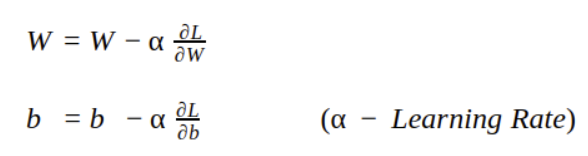

* While updating the weight parameters, it is better to use the fraction of gradient value instead of considering the full amount.For example, if the learning rate is α = 0.1,  means on each training iteration the weight parameters are updated only 10% of the gradient term.



* **Impact of LR on Neural Network**
    * The LR is a tuning parameter that controls the rate at which the model learns.
    * A too high learning rate allows the model to learn faster but, it might be overshooting the minimum point as the weight are updated rapidly.A small learning rate allows the model to learn slowly and carefully. It makes the smaller changes to the weight on each update. hence takes too long to converge.Learning rate that is too small may get stuck in an undesirable local minimum. Therefore, we should not use the learning rate too large and too small.
    * **The learning rate value depends on your Neural Network architecture as well as your training dataset.**

* **Find the Optimal LR**
    * Approached to find the best LR
        * LR Decay
        * LR SChedule
        * Adaptive LR

    * **LR Decay**
        * LR is slowly reduces over each training epoch is referred to the LR Decay
        * Sometimes the fixed learning rate face difficulties to converge perhaps due to the noisy data or many other factors.
        * LR decay helps the model to converge at an optimal value
            * It allows setting a large LR at the initial point and reduces it over time
                * this makes big changes to weight update at the begining of the training process and small changes towards the end of the training
                * 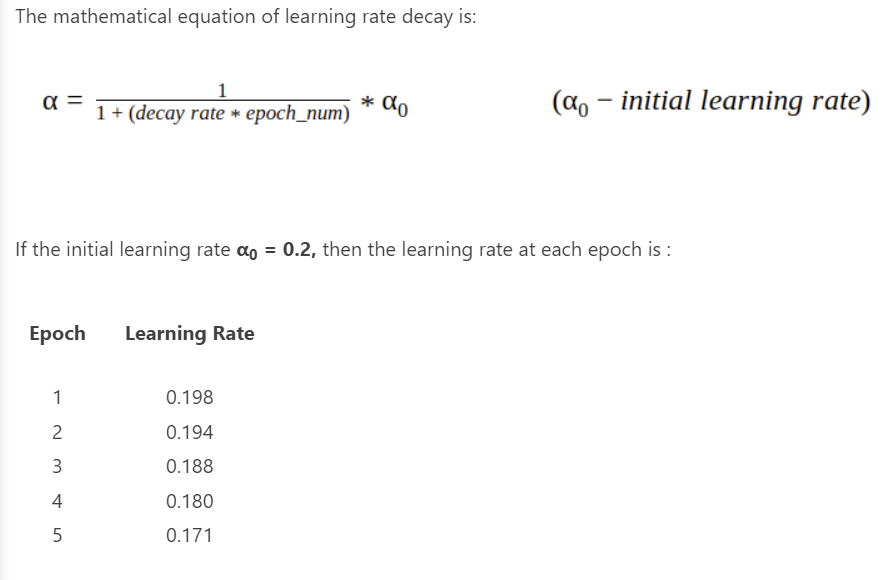

                * Below is the syntax to set learning rate decay by defining the decay parameter with stochastic gradient descent optimizer class.
                The default learning rate value is 0.01. And the learning rate decay parameter is set to 0 by default.```sgd = optimizers.SGD(lr=0.1,decay=0.01)
model.compile(..., optimizer=sgd)```

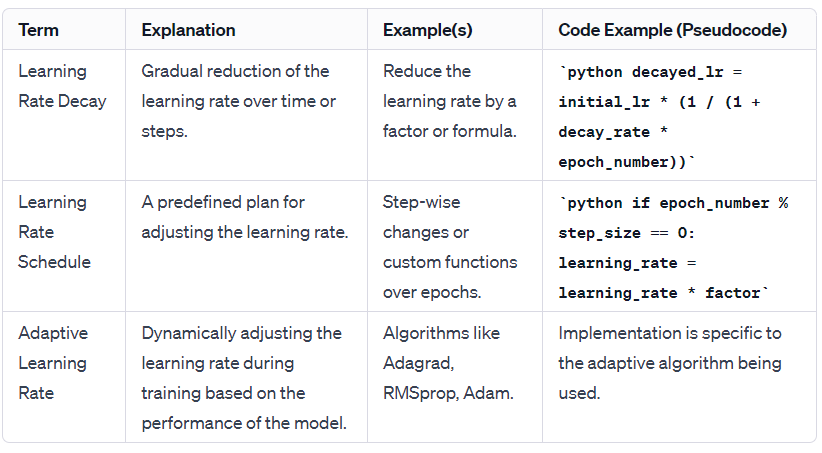

Learning Rate Decay:

Explanation:
Learning Rate Decay involves reducing the learning rate over time or steps during the training process.
The purpose is to fine-tune the model by taking smaller steps as it approaches convergence.

Example:
Exponential Decay: The learning rate is reduced exponentially with each epoch.
```
decayed_lr = initial_lr * (1 / (1 + decay_rate * epoch_number))
```

Learning Rate Schedule:

Explanation:
Learning Rate Schedule involves having a predefined plan for adjusting the learning rate during training.
It can be based on specific steps, epochs, or a custom function.

Example:
Step Decay: The learning rate is reduced by a factor at specific steps or epochs.
```
if epoch_number % step_size == 0:
    learning_rate = learning_rate * factor
```


Adaptive Learning Rate:

Explanation:
Adaptive Learning Rate involves dynamically adjusting the learning rate during training based on the model's performance.
Algorithms like Adagrad, RMSprop, and Adam fall under this category.
Adaptive methods compute individual learning rates for each parameter.

Example:
Adam Optimizer: Uses both first-order momentum and second-order moving average of past gradients to adaptively adjust the learning rates.

```
# Implementation is library-specific
# Below is a high-level overview using a deep learning library like TensorFlow or PyTorch
optimizer = Adam(learning_rate=initial_lr)
```
* Adaptive learning rate methods aim to address challenges like choosing an appropriate global learning rate for all parameters.

    * Examples of adaptive optimizers include:
        * Adagrad: Adapts the learning rates for each parameter based on the historical gradients. It accumulates the squared gradients and uses them to scale the learning rate.
        * RMSprop: A modification of Adagrad that uses a moving average of squared gradients. It helps overcome some of the limitations of Adagrad.
        * Adam (Adaptive Moment Estimation): Combines ideas from both momentum optimization and RMSprop. It uses both the first-order momentum and the second-order moving average of past gradients to adaptively adjust the learning rates.
        *


**Importance of Learning Rate Tuning:**
* Critical Hyperparameter:
    * The learning rate is a critical hyperparameter that influences the convergence and performance of a neural network during training.
    * An appropriate learning rate can lead to faster convergence, while a poorly chosen one may result in slow convergence, divergence, or overshooting.

* Impact on Training Dynamics:
    * Learning rate tuning affects the training dynamics, determining the step size for weight updates during optimization.
    * It balances the trade-off between faster convergence and stability.

**Challenges in Learning Rate Tuning:**

* No One-Size-Fits-All:
    * There's no one-size-fits-all learning rate. It depends on factors like the dataset, model architecture, and the specific optimization problem.
* Dynamic Nature:
    * The ideal learning rate may change during training. What works well initially may become too large or too small as the optimization progresses.



**A systematic approach towards finding the optimal learning rate**

Finding the optimal learning rate is a crucial step in training neural networks effectively. A systematic approach involves using various strategies to explore different learning rates and selecting the one that results in fast convergence without divergence or overshooting. Here's a systematic approach towards finding the optimal learning rate:



1. *Learning Rate Range Test:*
Implement a learning rate range test to identify a suitable range of learning rates for our model and dataset. This involves training the model for a few epochs while gradually increasing the learning rate.
```
# Pseudocode for Learning Rate Range Test
lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=1e-1, num_iter=100)
optimal_lr = lr_finder.get_best_lr()
```
2. *Plot Loss vs. Learning Rate:*
Plot the loss as a function of the learning rate during the range test. The optimal learning rate typically corresponds to the steepest downward slope before the loss starts to increase.
```
# Pseudocode for Plotting Loss vs. Learning Rate
lr_finder.plot()  # Plot the loss vs. learning rate curve
```
3. *Select Learning Rate Based on Plot:*
Choose a learning rate from the plot where the loss is decreasing at a good rate. This is often the point just before the loss starts to increase.

4.  *Use Learning Rate Schedulers:*
Implement learning rate schedulers or decay strategies during training to adaptively adjust the learning rate over epochs. Common schedules include step decay, exponential decay, or custom schedules based on performance metrics.
```
# Pseudocode for Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
for epoch in range(num_epochs):
    scheduler.step()  # Adjust learning rate
    train_model(model, train_data, train_labels, optimizer)
```
5.  *Experiment with Cyclical Learning Rates:*
Explore cyclical learning rates, where the learning rate oscillates between predefined bounds. This can help escape local minima and improve model generalization.
```
# Pseudocode for Cyclical Learning Rates
for epoch in range(num_epochs):
    cyclic_lr = triangular_cyclic_lr(epoch, base_lr, max_lr, step_size)
    optimizer.learning_rate = cyclic_lr
    train_model(model, train_data, train_labels, optimizer)
```
6. *Fine-Tuning and Validation:*
After selecting a potential optimal learning rate, fine-tune it based on the model's behavior on the validation set. Monitor metrics such as validation loss and accuracy to ensure good generalization.
7. *Regular Monitoring and Adjustments:*
Regularly monitor the training process and adjust the learning rate if needed. If the model is not converging or converging too slowly, consider increasing the learning rate. If it's diverging, decrease the learning rate.
Use a Subset of Data for Quick
8.  *Iterations:*
hen searching for the optimal learning rate, consider using a subset of your training data to speed up the process. This allows for quick iterations and helps in narrowing down the learning rate range.

By following this systematic approach, you can efficiently explore and find an optimal learning rate for your specific model and dataset. It's important to consider the characteristics of your data and the architecture of your neural network when fine-tuning the learning rate.









1. *Use a Model Validation Metric:*
Choose a relevant metric for model performance (e.g., validation loss or accuracy) and monitor it during training. This metric should guide the selection of the optimal learning rate.
```
# Pseudocode for Monitoring Validation Metric
for epoch in range(num_epochs):
    train_model(model, train_data, train_labels, optimizer)
    validation_metric = evaluate_model(model, validation_data, validation_labels)
    # Log or print validation metric for analysis
```
2. *Gradual Learning Rate Warm-up:*
Implement a learning rate warm-up at the beginning of training. Start with a small learning rate and gradually increase it over a few epochs. This can help stabilize the optimization process.
```
# Pseudocode for Learning Rate Warm-up
for epoch in range(num_warmup_epochs):
    warmup_lr = initial_lr * (epoch / num_warmup_epochs)
    optimizer.learning_rate = warmup_lr
    train_model(model, train_data, train_labels, optimizer)
```
3. *Check for Divergence:*
During training, keep an eye on whether the model is diverging. If the loss becomes NaN or increases significantly, it indicates that the learning rate may be too high.
```
# Pseudocode for Checking Divergence
for epoch in range(num_epochs):
    train_model(model, train_data, train_labels, optimizer)
    if loss is NaN or significantly increased:
        # Reduce learning rate and continue training
        optimizer.learning_rate *= 0.5
```
4. *Experiment with Optimizers:*
Besides tuning the learning rate, experiment with different optimizers. Some optimizers may be more robust to certain learning rates and architectures.
```
# Pseudocode for Experimenting with Optimizers
optimizer = torch.optim.Adam(model.parameters(), lr=optimal_lr)
```
5. *Batch Size Considerations:*
Keep in mind that the optimal learning rate may depend on the batch size used during training. Smaller batch sizes often require smaller learning rates.
6. *Iterative Refinement:*
The search for the optimal learning rate is an iterative process. After initial experiments, analyze the model's behavior, and if necessary, refine the learning rate based on observed trends.

7. *Use Cross-Validation:*
If applicable, use cross-validation to assess the generalization performance of the chosen learning rate. This involves splitting the dataset into multiple folds for training and validation.

8. *Consider Domain-Specific Knowledge:*
Consider domain-specific knowledge when selecting the optimal learning rate. Some tasks or architectures may benefit from specific learning rate ranges.

By systematically applying these steps and continuously refining the learning rate based on the observed behavior of the model, you can increase the likelihood of finding an optimal learning rate for your neural network training. It's crucial to strike a balance between convergence speed, stability, and generalization.

**Best Practices for LR tuning**
1. Learning Rate Schedules:
Implement learning rate schedules or decay strategies to adapt the learning rate over time.
Examples include step decay, exponential decay, or custom schedules based on performance metrics.
2. Monitoring Metrics:
Monitor training and validation metrics during training.
If the model is not converging, consider reducing the learning rate. If it's converging too slowly, try increasing it.
3. Experimentation:
Experiment with different learning rates, optimizers, and schedules.
Use techniques like grid search or random search for hyperparameter tuning.
4. Visualizations:
Visualize the training curves, including loss and accuracy, to identify patterns.
Plots can reveal if the learning rate is too high (fluctuating or diverging) or too low (slow convergence).
5. Warm-up Period:
Consider incorporating a warm-up period with a lower learning rate at the beginning of training to stabilize the optimization process.
6. Learning Rate Range Test:
Perform a learning rate range test by gradually increasing the learning rate during a few initial epochs and monitoring the loss. This can help identify a suitable range for learning rates.
```
# Pseudocode for Learning Rate Range Test
for lr in learning_rate_range:
    optimizer.learning_rate = lr
    train_model(model, train_data, train_labels, optimizer)
    # Monitor and record the loss at each learning rate
```
7. Cyclical Learning Rates:
Experiment with cyclical learning rates, where the learning rate oscillates between predefined bounds. This can sometimes help escape local minima.
```
# Pseudocode for Cyclical Learning Rates
for epoch in range(num_epochs):
    # Use a cyclic learning rate schedule
    cyclic_lr = triangular_cyclic_lr(epoch, base_lr, max_lr, step_size)
    optimizer.learning_rate = cyclic
```
8. Gradient Clipping:
Implement gradient clipping to prevent exploding gradients, especially when using a higher learning rate. This involves scaling gradients if they exceed a certain threshold.
```
# Pseudocode for Gradient Clipping
gradients = compute_gradients(model, loss)
clipped_gradients = clip_gradients(gradients, max_norm)
optimizer.apply_gradients(zip(clipped_gradients, model.trainable_variables))
```
9. Early Stopping:
Implement early stopping to halt training if the validation performance does not improve for a specified number of epochs. This can help prevent overfitting and avoid unnecessary computation.
```
# Pseudocode for Early Stopping
for epoch in range(num_epochs):
    train_model(model, train_data, train_labels, optimizer)
    validation_loss = evaluate_model(model, validation_data, validation_labels)
    if validation_loss has not improved for patience epochs:
        break  # Stop training
```
10. Learning Rate Warm-up:
Gradually increase the learning rate during the initial epochs to provide a warm-up period. This can stabilize the optimization process.
```
# Pseudocode for Learning Rate Warm-up
for epoch in range(num_warmup_epochs):
    warmup_lr = initial_lr * (epoch / num_warmup_epochs)
    optimizer.learning_rate = warmup_lr
    train_model(model, train_data, train_labels, optimizer)
```
11. Use Learning Rate Schedulers:
Explore learning rate schedulers provided by deep learning frameworks. These schedulers automatically adjust the learning rate during training based on specified policies.
```
# Pseudocode for Learning Rate Scheduler in PyTorch
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
for epoch in range(num_epochs):
    scheduler.step()  # Adjust learning rate
    train_model(model, train_data, train_labels, optimizer)
```
12. Monitoring Metrics:
Monitor various metrics during training, such as training loss, validation loss, and accuracy, to gain insights into model behavior and convergence.
```
# Pseudocode for Monitoring Metrics
for epoch in range(num_epochs):
    train_model(model, train_data, train_labels, optimizer)
    training_loss = compute_loss(model, train_data, train_labels)
    validation_loss = evaluate_model(model, validation_data, validation_labels)
    accuracy = compute_accuracy(model, validation_data, validation_labels)
    # Log or print metrics for analysis
```
